## **Multivariables Linear Regression Implementation Using Gradient Descent**


#### **Import Necessary Libraries**


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
plt.style.use("seaborn-v0_8-bright")

#### **Load the Data**

In [41]:
data = pd.read_csv("Multivariables_LR_Data.csv")

In [42]:
data.head()

,X1,X2,X3,y
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [43]:
data.shape

(25, 4)

#### **Define Variables 𝑋 and 𝑦**


In [44]:
# assign the first column to X
X = data.drop("y", axis=1).values

# assign the second column to y
y = data["y"].values.reshape(-1, 1)

#### **Explore Data**


In [45]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [46]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### **MultiVariables Linear Regression Full Implementation**


**Vectorize your implementation.**

<b>Notes:</b>

- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.


#### **Add a column of ones**


In [47]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

#### **Step 1: Initialize Parameters**


In [48]:
n = len(X[0])
m = len(y)

In [49]:
lr = 0.0001
theta = np.zeros((1, n))
print("Theta_Init: \n", theta)

Theta_Init: 
 [[0. 0. 0. 0.]]


#### **Step 2: Implement the Hypothesis Function**


$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

$$h_\theta(x) = X \theta^T$$


In [50]:
X.shape, theta.T.shape

((25, 4), (4, 1))

In [51]:
h_x = X @ theta.T
h_x

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

#### **Step 3: Calculate the Cost Function $J(\theta)$ (MSE)**


**Error Calculation**:
$$\text{Error} = h_x - y$$


In [52]:
h_x.shape, y.shape

((25, 1), (25, 1))

In [53]:
error = h_x - y
print("Error Vector:\n", error)

Error Vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]


$$J(\theta) = \frac{\| \text{Error} \|_2^2}{2m}$$


In [54]:
J_theta = (np.linalg.norm(error) ** 2) / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 13405.98


$$J(\theta) = \frac{\text{Error}^T \cdot \text{Error}}{2m}$$


In [55]:
error.T.shape, error.shape

((1, 25), (25, 1))

In [56]:
J_theta = ((error.T @ error)[0, 0]) / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 13405.98


#### **Step 4: Compute the Gradient**


$$\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}$$

$$\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \text{Error}^{(i)} x_j^{(i)}$$


In [57]:
error.T.shape, X.shape

((1, 25), (25, 4))

In [58]:
gradient_theta = (error.T @ X) / m
gradient_theta

array([[  -162.04, -13075.8 , -13147.2 , -13467.08]])

#### **Step 5: Update Parameters (Simultaneously)**


**Gradient Descent Function Update Rules**

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta})$$


In [59]:
theta.shape, gradient_theta.shape

((1, 4), (1, 4))

In [60]:
theta = theta - (lr * gradient_theta)
theta

array([[0.016204, 1.30758 , 1.31472 , 1.346708]])

#### **Step 6: Iterate Until Convergence**


Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.


In [61]:
# initialization
theta = np.zeros(( 1,n))
loss = []
lr = 0.0001
max_iter = 1000

for i in range(max_iter):
    print(f"{"*"*25} Iteration {i+1} {"*"*25}\n")

    h_x = X @ theta.T
    print("h(x):\n", h_x.ravel(),"\n")

    error = h_x - y
    print("Error Vector:\n", error.ravel(),"\n")

    J_theta = (np.linalg.norm(error) ** 2) / (2 * m)
    loss.append(J_theta)
    print("J(θ):", J_theta,"\n")

    if i > 0 and np.abs(loss[i - 1] - loss[i]) < 0.01:
        print(f"Loss change convergence achieved at iteration {i + 1}")
        break

    gradient_theta = (error.T @ X) / m
    print("gradient_theta:", gradient_theta.ravel(),"\n")

    gv_norm = np.linalg.norm(gradient_theta)
    print("Gradient Vector Norm: ", gv_norm,"\n")
    if gv_norm < 0.01:
        break

    temp_theta = theta - (lr * gradient_theta)
    theta = temp_theta
    print("Updated Theta:", theta.ravel(), "\n")

************************* Iteration 1 *************************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 

Error Vector:
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.] 

J(θ): 13405.98 

gradient_theta: [  -162.04 -13075.8  -13147.2  -13467.08] 

Gradient Vector Norm:  22917.5459892197 

Updated Theta: [0.016204 1.30758  1.31472  1.346708] 

************************* Iteration 2 *************************

h(x):
 [301.650244 362.560348 357.234064 389.057244 276.510624 203.864004
 291.22502  215.899264 338.842264 313.855728 280.579308 276.659996
 369.069972 306.802308 292.564588 367.915192 292.187588 349.498828
 351.854372 314.82572  341.507404 340.132136 325.599384 304.130312
 375.750104] 

Error Vector:
 [149.650244 177.560348 177.234064 193.057244 134.510624 102.864004
 142.22502  100.899264 163.842264 149.855728 139.579308 135.659996

---


#### **Summary**


In [62]:
# Define the hypothesis function
def hypothesis(X, theta):
    return X @ theta.T

In [63]:
# Calculate the error between the predicted and actual values
def calc_error(h_x, y):
    return h_x - y

In [64]:
# Compute the cost function (Mean Squared Error in this case)
def cost_function(error):
    m = error.shape[0]
    return (np.linalg.norm(error) ** 2) / (2 * m)

In [65]:
# Compute the gradient of the cost function
def compute_gradient(error, X):
    m = X.shape[0]
    return (error.T @ X) / m

In [66]:
# Update the theta values using the gradient and learning rate
def update_theta(theta, gradient_theta, lr):
    theta = theta - (lr * gradient_theta)
    return theta

In [67]:
def gradient_descent(
    X, y, lr=0.1, max_iter=10000, loss_threshold=0.0001, gradient_threshold=0.001
):
    n = X.shape[1]
    theta = np.zeros((1, n))  # Initialize theta with zeros
    loss = []

    for i in range(max_iter):
        # Compute predictions
        h_x = hypothesis(X, theta)

        # Calculate error
        error = calc_error(h_x, y)

        # Compute cost (Mean Squared Error)
        J_theta = cost_function(error)
        loss.append(J_theta)

        # Check for convergence based on loss difference
        if i > 0 and np.abs(loss[i - 1] - loss[i]) < loss_threshold:
            print(f"Loss change convergence achieved at iteration {i + 1}")
            break

        # Compute gradients
        gradient_theta = compute_gradient(error, X)

        # Compute gradient norm
        gradient_norm = np.linalg.norm(gradient_theta)

        # Check for convergence based on gradient norm
        if gradient_norm < gradient_threshold:
            print(f"Gradient norm convergence achieved at iteration {i + 1}")
            break

        # Update parameters
        theta = update_theta(theta, gradient_theta, lr)

    return theta, loss

In [68]:
lr = 0.0001
max_iter = 1000

theta_opt, loss = gradient_descent(
    X,
    y,
    lr=lr,
    max_iter=max_iter,
    loss_threshold=0.01,
    gradient_threshold=0.01,
)

print("Updated Theta:", theta_opt)

Loss change convergence achieved at iteration 154
Updated Theta: [[0.00787922 0.61241733 0.61391507 0.79980931]]


---


#### **Predict y values using the LR equation**


In [69]:
y_pred = hypothesis(X, theta_opt)
print("h(x) = y_predict:\n", y_pred.ravel())
print("\ny_actual:\n", y.ravel())

h(x) = y_predict:
 [153.8132482  185.36948297 182.36213092 198.94455083 141.21939069
 104.69560303 149.27970709 111.15929628 173.77031544 161.74612255
 143.62480957 141.96746087 188.06726983 155.88813357 150.07801866
 188.38282597 148.20709434 179.24830513 179.16439142 160.31669869
 175.00563426 174.199834   166.71517317 154.29300816 191.87592893]

y_actual:
 [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


#### **Evaluate Model**


**Use R2 score to evaluate LR equation output**

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [70]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [71]:
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9831719447283899


#### **Plot Loss Function**


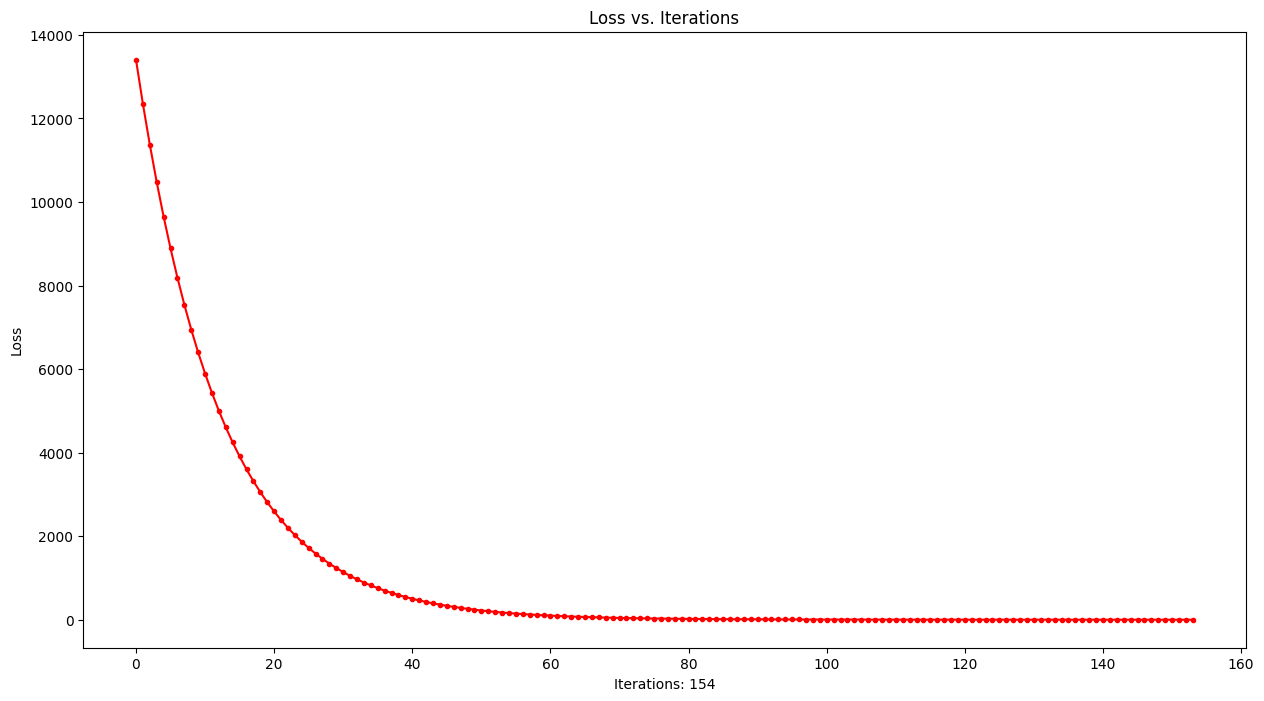

In [72]:
plt.figure(figsize=(15, 8))
plt.plot(loss, ".-r")
plt.title("Loss vs. Iterations")
plt.xlabel(f"Iterations: {len(loss)}")
plt.ylabel("Loss")
plt.show()